<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/Corporate_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install Libraries**

In [2]:
!pip install fredapi

### **Import Libraries**

In [3]:
import os
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **FRED API**

In [9]:
fred = Fred(api_key=userdata.get('FRED'))

### **Read In Data**

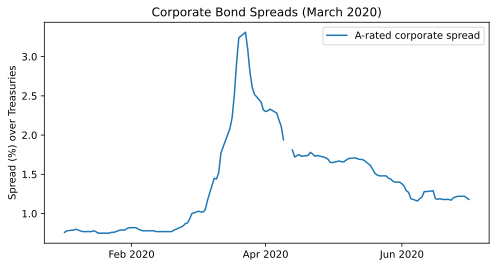

In [16]:
# A-rated corporate bond spread
spread = fred.get_series('BAMLC0A3CA')
spread.index = pd.to_datetime(spread.index)

# Focus on March 2020
spread = spread['2020-01-01':'2020-07-01']

# Plot
plt.figure(figsize=(8,4))
plt.plot(spread.index, spread, label='A-rated corporate spread')

plt.legend()
plt.title("Corporate Bond Spreads (March 2020)")
plt.ylabel("Spread (%) over Treasuries")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

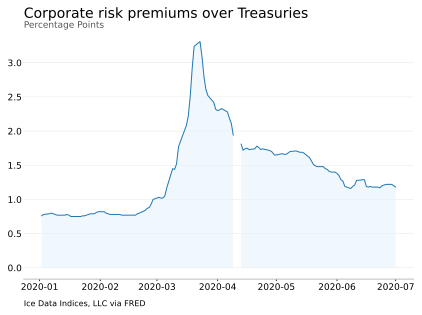

In [20]:
x = spread.index
y = spread.values

# --- NYT-style colors ---
line_color = '#1f77b4'
fill_color = "#e6f1fb"
forecast_fill = "#dfeaf7"
grid_color = '#e6e6e6'

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)


# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind
plt.ticklabel_format(style='plain', axis='y')  # <- disable sci notation on y-axis

# title + subtitle (left-aligned)
ax.text(0., 1.05, s='Corporate risk premiums over Treasuries', transform=ax.transAxes, size=14)
ax.text(0, 1.01, "Percentage Points", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Ice Data Indices, LLC via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

fig.savefig("corporate_risk.png", bbox_inches="tight", dpi=300)
plt.show()